In [2]:
import CMGDB

import matplotlib.pyplot as plt
import numpy as np
import time

ModuleNotFoundError: No module named 'CMGDB'

# 2D map example

Define a map, a domain, and sample points to evaluate the map

In [2]:
# Define map f
def f(x):
    return [x[0] / (2.0 - x[0]), x[1] / (2.0 - x[1])]

In [3]:
# Numpy random generator seed
np.random.seed(37)

In [4]:
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

num_pts = 2000

dim = len(lower_bounds)
X = np.random.uniform(lower_bounds, upper_bounds, size=(num_pts, dim))

Y = np.array([f(x) for x in X])

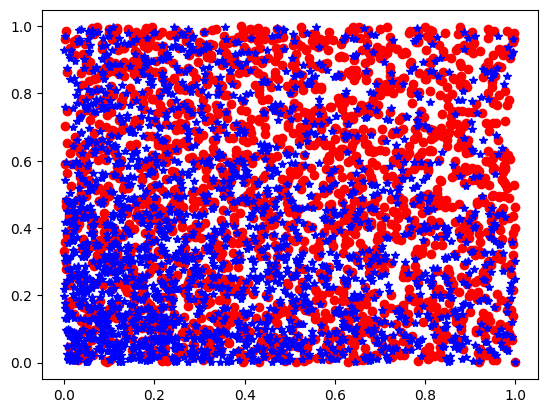

In [5]:
# Plot data
plt.plot(X[:,0], X[:,1], 'ro', Y[:,0], Y[:,1], 'b*')
plt.show()

# Define a box map from data

BY default the box map interpolates empty boxes.

In [6]:
F = CMGDB.BoxMapData(X, Y)

Use the box map above to compyte the Morse graph

In [8]:
subdiv_min = 10
subdiv_max = 11
subdiv_init = 4
subdiv_limit = 10000

lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [9]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 52.8 ms, sys: 11.3 ms, total: 64 ms
Wall time: 32.6 ms


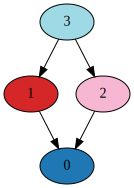

In [10]:
CMGDB.PlotMorseGraph(morse_graph)

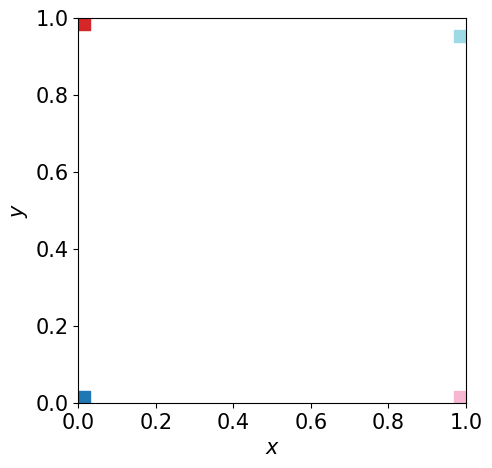

In [11]:
CMGDB.PlotMorseSets(morse_graph, fig_w=5, fig_h=5)

## Map empty boxes outside

Define a box map mapping empty boxes outside the domain

In [12]:
lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

F = CMGDB.BoxMapData(X, Y, map_empty='outside', lower_bounds=lower_bounds, upper_bounds=upper_bounds)

In [13]:
subdiv_min = 10
subdiv_max = 11
subdiv_init = 4
subdiv_limit = 10000

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [14]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 37 ms, sys: 2.1 ms, total: 39.1 ms
Wall time: 38 ms


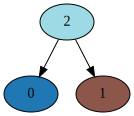

In [15]:
CMGDB.PlotMorseGraph(morse_graph)

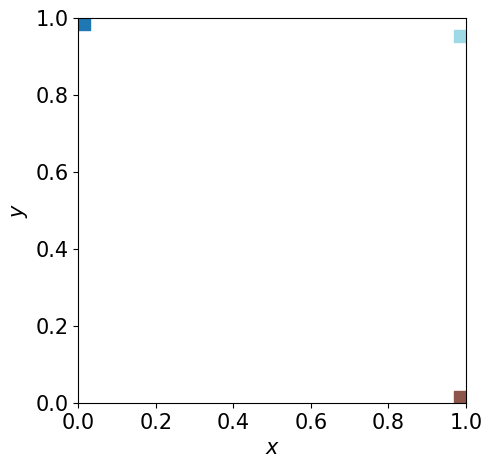

In [16]:
CMGDB.PlotMorseSets(morse_graph, fig_w=5, fig_h=5)

## Terminate if empty boxes

Define a box map which will abort the computation if there are empty boxes

In [17]:
F = CMGDB.BoxMapData(X, Y, map_empty='terminate')

In [18]:
subdiv_min = 10
subdiv_max = 11
subdiv_init = 4
subdiv_limit = 10000

lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [19]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

ValueError: Rectangle [0.0, 0.0, 0.015625, 0.03125] has empty image

Let's compute on a coraser grid to avoid having empty boxes

In [20]:
subdiv_min = 8
subdiv_max = 9
subdiv_init = 4
subdiv_limit = 10000

lower_bounds = [0.0, 0.0]
upper_bounds = [1.0, 1.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, F)

In [21]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 34.4 ms, sys: 2.57 ms, total: 37 ms
Wall time: 36 ms


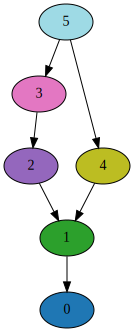

In [22]:
CMGDB.PlotMorseGraph(morse_graph)

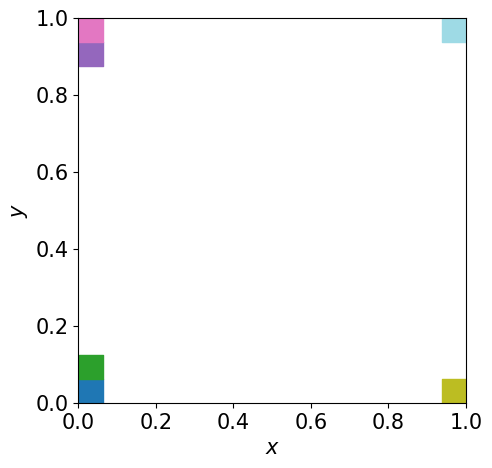

In [23]:
CMGDB.PlotMorseSets(morse_graph, fig_w=5, fig_h=5)